In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matrixensembles import NNBosonXXZ, MatrixStats, BosonChainSampler

100%|██████████| 500/500 [01:49<00:00,  4.55it/s]


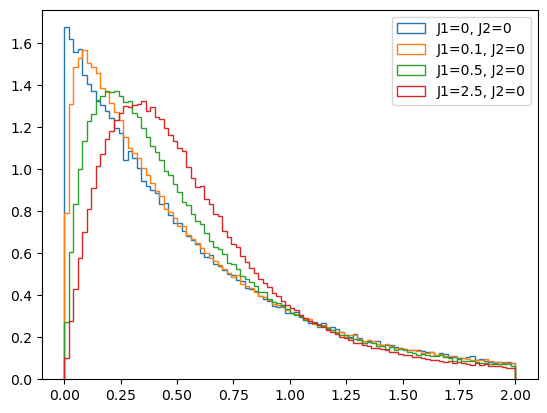

In [58]:
n, e = 18, 3
J1 = 0.5
J2 = 0
W = 2
t = 1
for J1 in [0, 0.1, 0.5, 2.5]:
	sampler = NNBosonXXZ(n, W, t, J1, J2, e=e, w0=100)
	matrixstats = MatrixStats(sampler)
	matrixstats.collect(n_realizations=500, eigenvectors=False)
	_ = plt.hist(matrixstats.s().flatten(), bins=100, density=True, range=(0, 2), histtype='step', label=f'J1={J1}, J2={J2}')
plt.legend()
plt.savefig("perturbedXXZres/W2t1_J1.png")
plt.savefig("perturbedXXZres/W2t1_J1.svg")

100%|██████████| 500/500 [01:49<00:00,  4.58it/s]


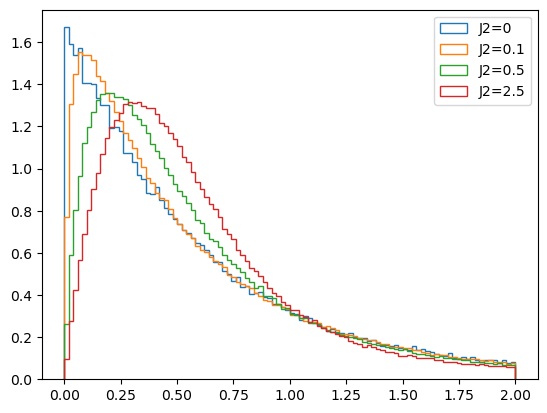

In [56]:
### Exact
n, e = 18, 3
J1 = 0
J2 = 1/2
W = 2
t = 1
for J2 in [0, 0.1, 0.5, 2.5]:
	sampler = NNBosonXXZ(n, W, t, J1, J2, e=e, w0=100)
	matrixstats = MatrixStats(sampler)
	matrixstats.collect(n_realizations=500, eigenvectors=False)
	_ = plt.hist(matrixstats.s().flatten(), bins=100, density=True, range=(0, 2), histtype='step', label=f'J2={J2}')
plt.legend()
plt.savefig("perturbedXXZres/W2t1_J2.png", dpi=300)
plt.savefig("perturbedXXZres/W2t1_J2.svg")

100%|██████████| 500/500 [01:48<00:00,  4.63it/s]


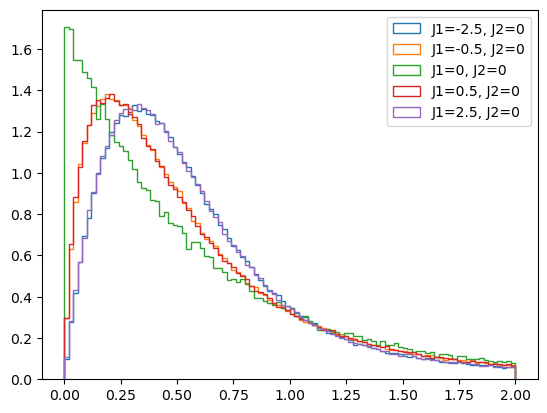

In [57]:
n, e = 18, 3
J1 = 0.5
J2 = 0
W = 2
t = 1
for J1 in [-2.5, -0.5, 0, 0.5, 2.5]:
	sampler = NNBosonXXZ(n, W, t, J1, J2, e=e, w0=100)
	matrixstats = MatrixStats(sampler)
	matrixstats.collect(n_realizations=500, eigenvectors=False)
	_ = plt.hist(matrixstats.s().flatten(), bins=100, density=True, range=(0, 2), histtype='step', label=f'J1={J1}, J2={J2}')
plt.legend()
plt.savefig("perturbedXXZres/W2t1Jneg.png", dpi=300)
plt.savefig("perturbedXXZres/W2t1Jneg.svg")

100%|██████████| 500/500 [01:09<00:00,  7.21it/s]


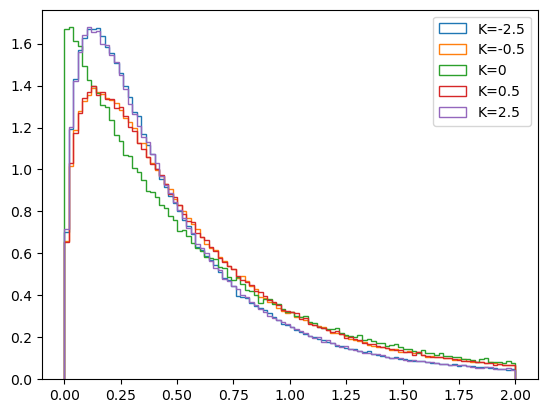

In [64]:
n, e = 18, 3
W = 2
t = 1
for K in [-2.5, -0.5, 0, 0.5, 2.5]:
	sampler = BosonChainSampler(n, W, t, K, e=e, w0=100)
	matrixstats = MatrixStats(sampler)
	matrixstats.collect(n_realizations=500, eigenvectors=False)
	_ = plt.hist(matrixstats.s().flatten(), bins=100, density=True, range=(0, 2), histtype='step', label=f'K={K}')
plt.legend()
plt.savefig("perturbedXXZres/W2t1Kneg.png", dpi=300)
plt.savefig("perturbedXXZres/W2t1Kneg.svg")

100%|██████████| 200/200 [00:27<00:00,  7.25it/s]


[1.51970651 1.39173866 1.33494047]


100%|██████████| 200/200 [00:27<00:00,  7.21it/s]


[5.47994694 2.9941644  0.71986613]


100%|██████████| 200/200 [00:27<00:00,  7.35it/s]


[5.91829001 3.25355354 0.63626793]


100%|██████████| 200/200 [00:27<00:00,  7.26it/s]


[12.96616245  4.71027771  0.5297135 ]


100%|██████████| 200/200 [00:27<00:00,  7.40it/s]


[27.14113289  6.60188145  0.49161051]


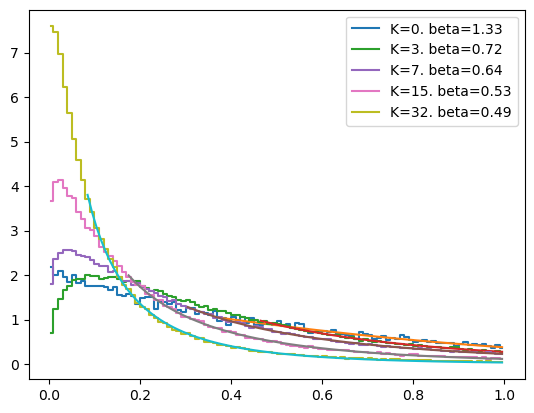

In [88]:
# import libraries for fitting histograms
from scipy.optimize import curve_fit
import matplotlib.cm as cm

def betaexp(x, A, alpha, beta):
	return A * np.exp(-alpha*x**beta)

n, e = 18, 3
W = 2
t = 1
for i, K in enumerate([0, 3, 7, 15, 32]):
	sampler = BosonChainSampler(n, W, t, K, e=e, w0=100)
	matrixstats = MatrixStats(sampler)
	matrixstats.collect(n_realizations=200, eigenvectors=False)
	values = matrixstats.s().flatten()
	# compute the histogram and fit an exponential
	hist, bin_edges = np.histogram(values, bins=100, density=True, range=(0, 1))
	bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
	peak = np.argmax(hist)
	idx = np.argmax(hist[peak:] < hist[peak]/2) + peak
	popt, pcov = curve_fit(betaexp, bin_centers[idx:], hist[idx:], p0=[1, 1, 1], bounds=([1, 0.1, 0.4], [np.inf, np.inf, np.inf]))
	print(popt)
	# plot the histogram and the fit.
	plt.step(bin_centers, hist, label=f"K={K}. beta={popt[2]:.2f}", where='mid')
	plt.plot(bin_centers[idx:], betaexp(bin_centers[idx:], *popt))
	
plt.legend()
plt.savefig("perturbedXXZres/W2t1Kfit.png", dpi=300)
plt.savefig("perturbedXXZres/W2t1Kfit.svg")